**Project Overview:**

Using values extracted from an equation, with a set number of values and added noise, we can extract the posterior distributions for each coefficient using a Bayesian Linear Regression Model. 

In [ ]:
pip install bambi

In [24]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import bambi as bmb
import pandas as pd
import arviz as az


### Define True Model Function and Sample Data



$ y = 2t + 1 $

In [25]:
ndata = 200 #number of known data points

t0 = -1.0
t1 = 1.0
t = jnp.linspace(t0, t1, ndata)

def true_fun(t):
    return jnp.array([2*t + 1])

In [26]:
stdev = 1

true_y = true_fun(t).squeeze() 
true_y = true_y + np.random.normal(scale=stdev, size=true_y.shape)

Text(0, 0.5, 'y')

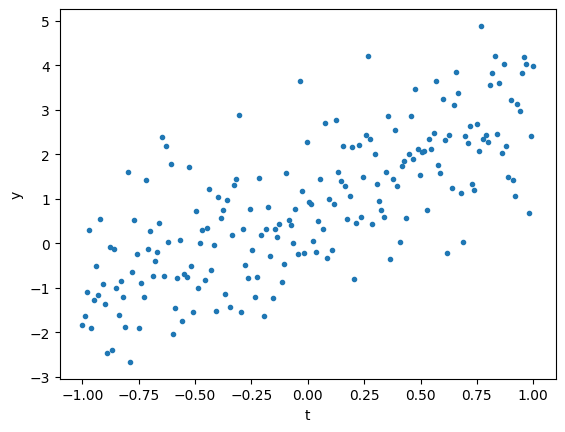

In [27]:
#plot the training data
plt.plot(t, true_y, '.')
plt.xlabel('t')
plt.ylabel('y')

Below Code Referenced from https://bambinos.github.io/bambi/notebooks/getting_started.html

In [28]:
# Create a DataFrame with the data
data = pd.DataFrame({'t': t, 'y': true_y})

# Define the model formula and prior
formula = 'y ~ t'
prior = {'Intercept': bmb.Prior("Normal", mu=0, sigma=100000000),
         't': bmb.Prior("Normal", mu=0, sigma=100000000)}

# Define the model
model = bmb.Model(data=data, formula=formula, priors=prior)

# Fit the model
results = model.fit(method='mcmc', draws=1000, chains=4)

/usr/local/lib/python3.9/dist-packages/bambi/models.py:282: FutureWarning: the method argument has been deprecated, please use inference_method
  warnings.warn(


array([<Axes: title={'center': 'Intercept'}>,
       <Axes: title={'center': 't'}>, <Axes: title={'center': 'y_sigma'}>],
      dtype=object)

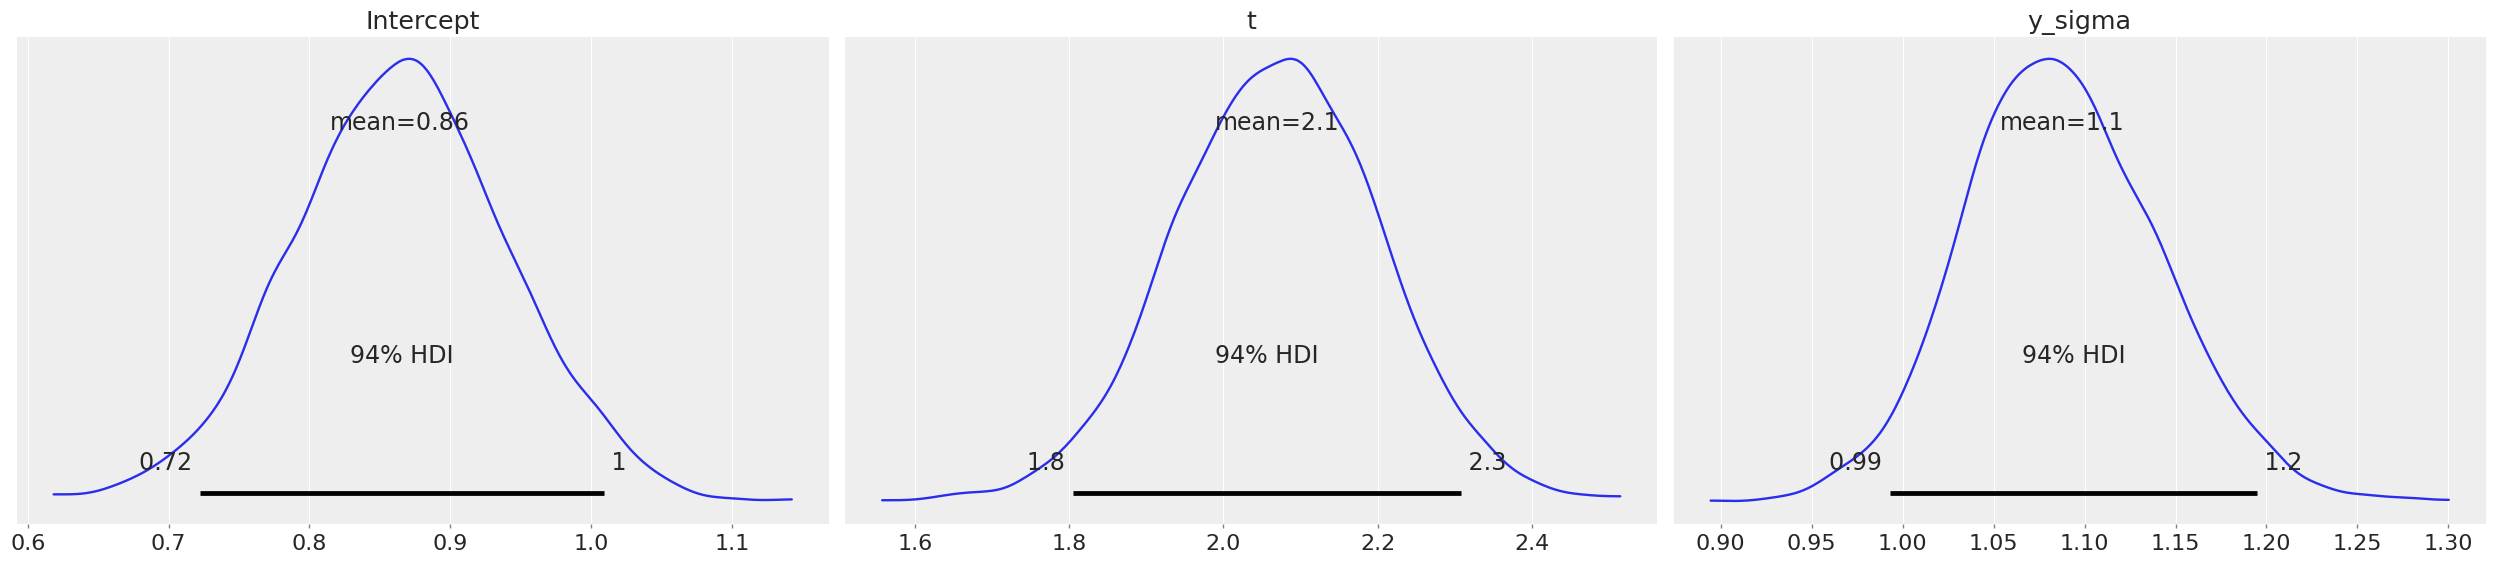

In [31]:
az.style.use("arviz-darkgrid")
az.plot_posterior(results,textsize=16)

In [32]:
# Posterior Distribution Summary:
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.864,0.076,0.722,1.009,0.001,0.001,5250.0,3301.0,1.0
t,2.069,0.134,1.805,2.308,0.002,0.001,5709.0,3116.0,1.0
y_sigma,1.088,0.054,0.993,1.195,0.001,0.000,6557.0,2635.0,1.0


In [33]:
model.backend.model

Here's what we used for our prior and likelihood:
 
 \begin{array}{rcl}
            \text{y_sigma} &\sim & \operatorname{HalfStudentT}(4,~1.57)\\\text{Intercept} &\sim & \operatorname{N}(0,~1e+08)\\\text{t} &\sim & \operatorname{N}(0,~1e+08)\\\text{y} &\sim & \operatorname{N}(f(\text{Intercept},~\text{t}),~\text{y_sigma})
            \end{array}